In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [20]:
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

In [21]:

import dlib
import numpy as np

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

img = dlib.load_rgb_image('../jaffe/ANGRY/angry4.jpg')

rect = detector(img)[0]
sp = predictor(img, rect)
landmarks = np.array([[p.x, p.y] for p in sp.parts()])

In [22]:
outline = landmarks[[*range(17), *range(26,16,-1)]]

In [23]:
import skimage
Y, X = skimage.draw.polygon(outline[:,1], outline[:,0])

In [24]:
cropped_img = np.zeros(img.shape, dtype=np.uint8)
cropped_img[Y, X] = img[Y, X]

In [25]:
img_mask = np.zeros(img.shape,dtype=np.uint8)
img_mask[Y,X] = 1

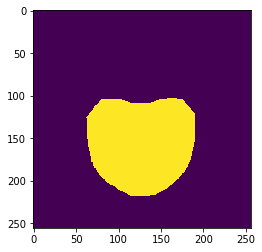

In [26]:
plt.imshow(img_mask[:,:,2])

In [27]:
img_mask.shape

(256, 256, 3)

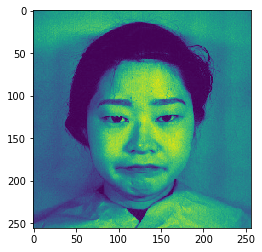

In [28]:
plt.imshow(img[:,:,2])

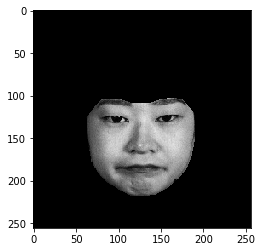

In [29]:
plt.imshow(cropped_img)

In [30]:
img[:,:,2]==img[:,:,1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

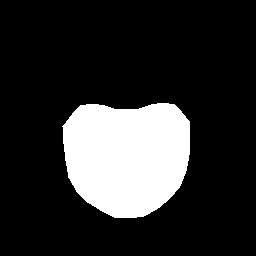

In [33]:
Image.fromarray(img_mask*255)

In [34]:
test = img *img_mask

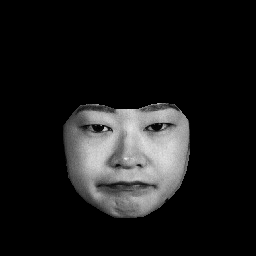

In [35]:
Image.fromarray(test)